In [6]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time

# Lecture 5: SciPy

# Scientific Python: SciPy

SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering, see https://scipy.org/.

In particular, these are some of the core parts (not all of these are technically a part of SciPy):
- **Python**, a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping, while being powerful enough to write large applications in.
- **NumPy**, *the* fundamental package for numerical computation. It defines an numerical array (and matrix) type and the basic operations using them.
- **Matplotlib**, a mature and popular plotting package, that provides publication-quality 2D plotting as well as rudimentary 3D plotting

- **The SciPy library**, a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.
- **pandas**, providing high-performance, easy to use data structures.
- **SymPy**, for symbolic mathematics and computer algebra.
- **scikit-image**, a collection of algorithms for image processing.
- **scikit-learn**, a collection of algorithms and tools for machine learning.

In this lecture when we talk about **SciPy**, we will be reffering to **the SciPy library**.

# The SciPy library

## SciPy packages

The SciPy library comes with a large set of packages:

- **cluster**, Clustering algorithms
- **constants**, Physical and mathematical constants
- **fftpack**, Discrete FFT routines
- **integrate**, Integration and ODE solvers
- **interpolate**, Spline interpolation
- **io**, Input output routines
- **linalg**, Linear algebra
- **misc**, Miscellaneous routines
- **ndimage**, N-dimensional image processing
- **odr**, Orthogonal distance regression
- **optimize**, Optimization and root finding
- **signal**, Signal processing
- **sparse**, Sparse matrices and implicit matrix routines
  - **sparse.linalg**, Sparse linear algebra
  - **sparse.csgraph**, Compressed Sparse Graph Routines
- **spatial**, Spatial data structures and algorithms
- **special**, Special functions
- **stats**, Statistical distribution and functions
- **weave**, C/C++ integration

See https://docs.scipy.org/doc/scipy/reference/tutorial/index.html#user-guide for a complete list.

## "Best of SciPy" show-case
Today we will showcase a few selected packages
- Special functions
- Numerical integration
- Solving Ordinary Differential Equations (ODE:s)
- Spline interpolation and smoothing
- Optimization and root finding
- Sparse matrix types 
- Implicit matrix algorithms, linear system solvers
- Image processing and analysis
- File I/O

Extra material:
- Statistics
- Signal processing


# Special Functions

The `scipy.special` package include many special functions, e.g.
* `airy`
* `elliptic`
* `bessel`
* `gamma`
* `beta`
* `hypergeometric`
* `parabolic cylinder`
* `mathieu`
* `spheroidal wave`
* `struve`
* `kelvin`
* etc.

For a complete list see the [Scipy Reference Manual on special functions](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html)

## Example: Spherical Bessel functions of the 1st kind
The Bessel functions $j_v(z)$ are eigen functions of the radial modes of a circular drum
- `scipy.special.jv(v, z)` where `v` is the order and `z` the argument

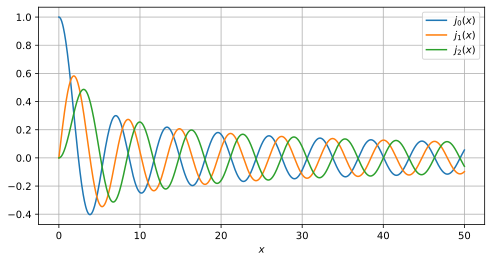

In [7]:
from scipy.special import jv
x = np.linspace(0, 50, num=1000)

for v in range(3):
    plt.plot(x, jv(v, x), label=f'$j_{v}(x)$')

plt.legend(); plt.grid(); plt.xlabel('$x$');

# Integration: `scipy.integration`

The `scipy.integrate` package contains methods for 
- integrals
- ordinary differential equations (ODE:s)
- https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

## Numerical integration `scipy.integrate`

For adaptive numerical integration of *function* objects, use the `scipy.integrate` methods:
- `quad(func, start, end)`, single integral
- `dblquad(func, starts, ends)`, double integral
- `tplquad(func, starts, ends)`, triple integral
- `nquad(func, ranges)`, integration over multiple variables.

## Example: `scipy.integrate.quad`
Lets compute the integral
  $$\int_{-\infty}^{\infty} \, e^{-x^2} dx = \sqrt{\pi}$$
over the whole real interval, using numerical quadrature.

In [8]:
from scipy.integrate import quad

def func(x): return np.exp(-x**2)

# Note to self: Try increasing the accuracy epsabs
I, abs_err = quad(func, -float('inf'), float('inf'), epsabs=1e-4)
    
print('Analytic:', np.sqrt(np.pi) )
print('Numeric :', I, '+/-', abs_err )

Analytic: 1.7724538509055159
Numeric : 1.7724538509067373 +/- 4.316364671592271e-06


The `quad` function performs **adaptive** integration and ensures that the result has the requested accuracy.

##  Integration of discretized data

For numerical integration of *already discretized data* `scipy.integrate` provides `cumulative_trapezoid `, `trapezoid` `simpson` and `romb`

Lets try out `cumulative_trapezoid`

In [9]:
from scipy.integrate import cumulative_trapezoid
help(cumulative_trapezoid)

Help on function cumulative_trapezoid in module scipy.integrate._quadrature:

cumulative_trapezoid(y, x=None, dx=1.0, axis=-1, initial=None)
    Cumulatively integrate y(x) using the composite trapezoidal rule.
    
    Parameters
    ----------
    y : array_like
        Values to integrate.
    x : array_like, optional
        The coordinate to integrate along. If None (default), use spacing `dx`
        between consecutive elements in `y`.
    dx : float, optional
        Spacing between elements of `y`. Only used if `x` is None.
    axis : int, optional
        Specifies the axis to cumulate. Default is -1 (last axis).
    initial : scalar, optional
        If given, insert this value at the beginning of the returned result.
        Typically this value should be 0. Default is None, which means no
        value at ``x[0]`` is returned and `res` has one element less than `y`
        along the axis of integration.
    
    Returns
    -------
    res : ndarray
        The result of c

## Example: `scipy.integrate.cumulative_trapezoid`

Integrate $f(x) = x^2$ with the condition that the result should be zero for $x = 1$:

$$
f(x) = x^2 
\quad \Rightarrow \quad
F(x) = \int_1^x f(s) \, ds = \frac{x^3}{3} - \frac{1}{3}
$$

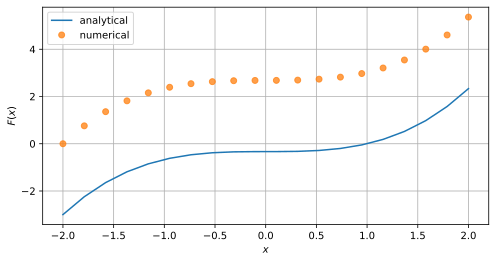

In [10]:
from scipy.integrate import cumulative_trapezoid as scipy_cumtrapz

x = np.linspace(-2, 2, num=20)
f = x**2
F = scipy_cumtrapz(f, x, initial=0) 
#print(x)
#print(F)

plt.plot(x, (x**3 - 1)/3, label='analytical')
plt.plot(x, F, 'o', label='numerical', alpha=0.75)

plt.grid(); plt.legend(loc='best'); plt.xlabel('$x$'); plt.ylabel('$F(x)$');

Why do these differ? How can we get the correct solution?

Hint: 2 methods, shift Y or X

## Ordinary Differential Equations (ODEs)

- The `scipy.integrate` package also provide solvers for Ordinary Differential Equations (ODEs)
- For example `solve_ivp` is
  - an Initial Value Problem (IVP) solver 
  - for coupled sets of ODEs

IVPs are problems of the form
  $$\frac{d}{dt} \mathbf{y} = \mathbf{f}(t, \mathbf{y})
, \quad \mathbf{y}(t_0) = \mathbf{y}_0$$

In [11]:
from scipy.integrate import solve_ivp
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a co

## Example: The damped oscillator

The equation of motion for a damped oscillator can be written as

$$\frac{d^2}{dt^2} x + 2\xi \omega_0 \frac{d}{dt} x + \omega_0^2 x = 0$$

with an angular frequency $\omega_0$ and a damping ratio $\xi$.

To be able to solve this using `scipy.integrate.solve_ivp` 
- reformulate the problem to standard form
- to do this let $v \equiv \frac{d}{dt} x$ and $\mathbf{y} \equiv \left[ \begin{array}{c}
    v \\ 
    x 
  \end{array} \right]$
- we can then write this as a vector valued equation with only a first order time derivative
  $$
  \frac{d}{dt} \mathbf{y}
  = 
  \mathbf{f} ( t, \mathbf{y} )
\quad \Leftrightarrow \quad
\frac{d}{dt} 
  \left[ \begin{array}{c}
    v \\ 
    x 
  \end{array} \right] = 
  \left[ \begin{array}{c}
    -2\xi \omega_0 v - \omega_0^2 x \\ 
    v
  \end{array} \right]
  $$  

## Implementation: The damped oscillator
Implement $ f(t, \mathbf{y}) \equiv 
  \left[ \begin{array}{c}
    -2\xi \omega_0 v - \omega_0^2 x \\ 
    v
  \end{array} \right]$
  
Set $\omega_0 = 1.0$ and $\xi = 0.1$ and use $x(0) = 1$ and $v(0) = \frac{d}{dt} x(0) = 0.0$

Number of integration points: (16,)


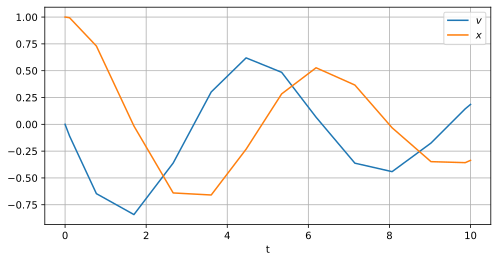

In [12]:
omega0, xi = 1.0, 0.1

def f(t, y):
    v, x = y
    return [-2*xi*omega0*v - omega0**2*x, v]

res = solve_ivp(
    f, y0=(0, 1), t_span=(0, 10), # Time range
    #method='RK23', # RK45 is default
    #rtol=1e-5,
    ) ## Note to self: Try lower order Runge-Kutta method and tune relative tolerance

def plot_res(res):
    plt.plot(res.t, res.y[0], label='$v$')
    plt.plot(res.t, res.y[1], label='$x$')
    plt.legend(); plt.xlabel('t'); plt.grid();
    print(f'Number of integration points:', res.t.shape)

plot_res(res)

The stepping in the `solve_ivp` result can be controlled using `t_eval`.

Number of integration points: (400,)


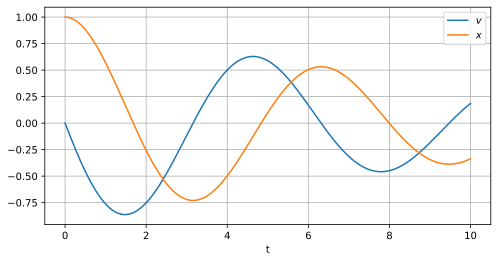

In [13]:
t = np.linspace(0, 10.0, num=400)

res = solve_ivp(
    f, y0=(0, 1),
    t_span=(t.min(), t.max()), t_eval=t)

plot_res(res)

# Interpolation: `scipy.interpolate`

[The `scipy.interpolate` module](https://docs.scipy.org/doc/scipy/reference/interpolate.html) provides several methods for:
* Univariate interpolation (one variable)
* Multivariate interpolation
* 1D splines
* 2D splines

For example: For 1D spline interpolation we can use `UnivariateSpline(x, y, ...)` and its methods

In [14]:
from scipy.interpolate import UnivariateSpline
help(UnivariateSpline)

Help on class UnivariateSpline in module scipy.interpolate.fitpack2:

class UnivariateSpline(builtins.object)
 |  UnivariateSpline(x, y, w=None, bbox=[None, None], k=3, s=None, ext=0, check_finite=False)
 |  
 |  1-D smoothing spline fit to a given set of data points.
 |  
 |  Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
 |  specifies the number of knots by specifying a smoothing condition.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      1-D array of independent input data. Must be increasing;
 |      must be strictly increasing if `s` is 0.
 |  y : (N,) array_like
 |      1-D array of dependent input data, of the same length as `x`.
 |  w : (N,) array_like, optional
 |      Weights for spline fitting.  Must be positive.  If `w` is None,
 |      weights are all equal. Default is None.
 |  bbox : (2,) array_like, optional
 |      2-sequence specifying the boundary of the approximation interval. If
 |      `bbox` is None, ``bbox=[x[0], x[-

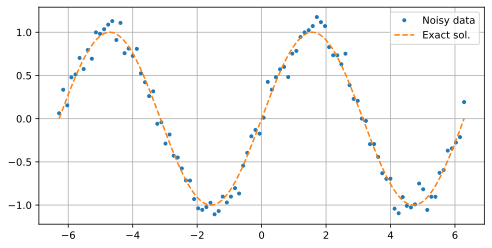

In [15]:
x = np.linspace(-2*np.pi, 2*np.pi, num=100)
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)

x_fine = np.linspace(x.min(), x.max(), num=1000)

def plot_spline():
    plt.plot(x, y, '.', label='Noisy data')
    plt.plot(x_fine, np.sin(x_fine), '--', label='Exact sol.')
    plt.legend(loc='upper right'); plt.grid();

plot_spline()

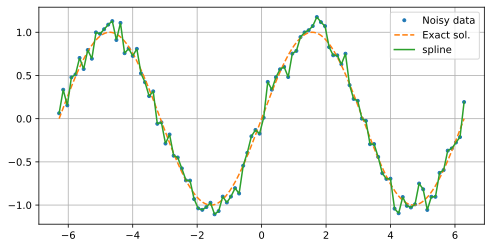

In [16]:
from scipy.interpolate import UnivariateSpline

spline = UnivariateSpline(x, y, s=0, k=1) # 1st order spline, line interp

plot_spline()
plt.plot(x_fine, spline(x_fine), '-', label='spline')
plt.legend(loc='upper right');

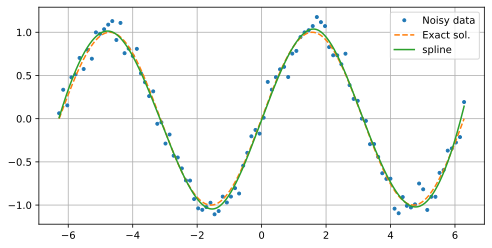

In [17]:
spline = UnivariateSpline(x, y, s=1.) # Smoothing

plot_spline()
plt.plot(x_fine, spline(x_fine), label='spline')
plt.legend(loc='upper right');

## 2D interpolation
- use `scipy.interpolate.SmoothBivariateSpline(x, y, z, ...)`

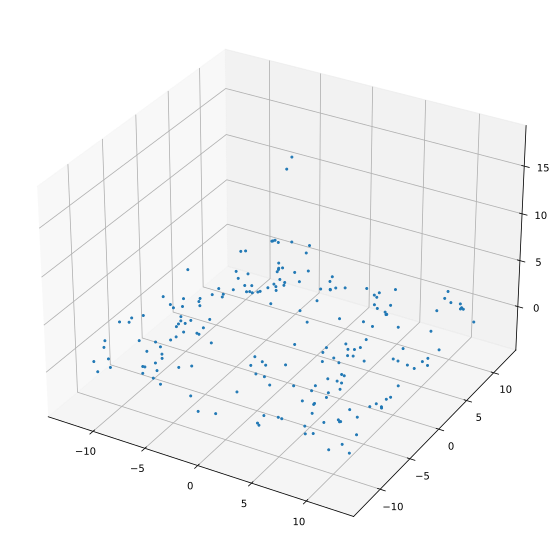

In [18]:
def hat(x, y):
    r = np.sqrt(x**2 + y**2)
    return 20.0*np.sin(r)/r
    
Npoints = 200
points = 8. * np.pi * (np.random.random((Npoints, 2)) - 0.5) # Random grid points
x, y = points.T
values = hat(x, y)
    
tmp = np.linspace(-4*np.pi, 4*np.pi, num=100)
X, Y = np.meshgrid(tmp, tmp)

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot(x, y, values, markersize=4, marker='.', linewidth=0)

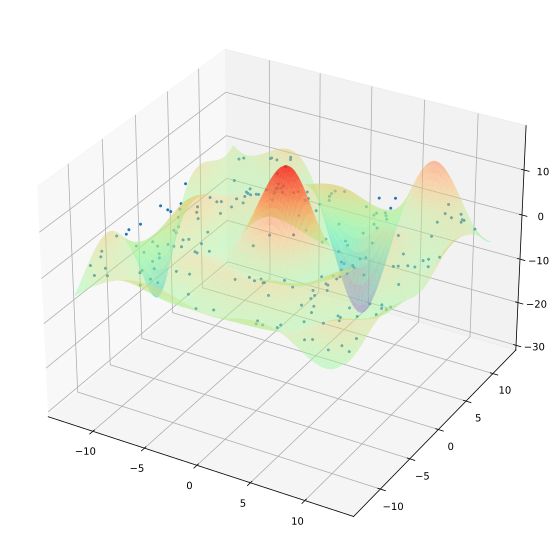

In [19]:
from scipy.interpolate import SmoothBivariateSpline

spline = SmoothBivariateSpline(x, y, values) #, kx=1, ky=1, s=0)
Z = spline(tmp, tmp)

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot(x, y, values, markersize=4, marker='.', linewidth=0)
ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow, rstride=1, cstride=1, alpha=.5, linewidth=0)

# Linear Algebra `scipy.linalg`

- [Basic linear algebra in NumPy `numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
- [SciPy provides extra functionality in `scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html)

Summary of routines in `numpy.linalg`
- `norm(A)`, matrix or vector norm (default 2-norm)
- `det(A)`, determinant of 2D equal dimensional arrays
- `solve(A, b)`, solves linear system $A \cdot \mathbf{x} = \mathbf{b}$
- `qr(A)`, QR-factorization
- `inv(A)`, `pinv(A)`, matrix- and pseudo-inverse
- `eig(A)`, `eigvals(A)`, eigenvalues and eigenvectors of $A$
- `svd(A)`, Single-value decomposition

The `numpy.linalg` routines covers most of (and is implemented using!) LAPACK functionality.
- LAPACK is a standard API for numerical linear algebra routines
- most software packages use this API, e.g. Matlab and NumPy/SciPy

SciPy provides extra functionality for:
- Matrix Factorizations
- Matrix Functions
- Sparse Matrices
- Special Matrices

## Matrix Factorizations `scipy.linalg`

Several methods for matrix factorization is available in SciPy:
- LU decomposition
- Cholesky decomposition
- QR decomposition
- Schur decomposition

### LU decomposition
Matrix factorization of a $M \times N$ matrix of the form
$$A = P \cdot L \cdot U$$
where $P$ is a permutation matrix $L$ is lower- and $U$ is upper-triangular.

This is useful for repeatedly solving linear systems with different right-hand-sides $\mathbf{b}_i$
$$A \cdot \mathbf{x}_i = \mathbf{b}_i$$

(Cholesky decomposition does the same but for positive definite hermitian matrices.)

In [20]:
from scipy.linalg import lu_factor, lu_solve

n = 50
N = 1000
A = np.random.random((N, N))

t = time.time()    
lu, P = lu_factor(A)
for idx in range(n):
    b = np.random.random(N)
    x = lu_solve((lu, P), b)    
print(f'LU-solve: {time.time() - t:4.3f}s (including factorization!)')

t = time.time()
for idx in range(n):
    b = np.random.random(N)
    x = np.linalg.solve(A, b)
print(f'np.solve: {time.time() - t:4.3f}s')

LU-solve: 0.051s (including factorization!)
np.solve: 0.712s


### QR decomposition
Matrix factorization of the form
$$A = Q R$$
where $Q$ is an orthogonal matrix (i.e. $Q \cdot Q^T = \mathbf{1}$ or  $Q^T \cdot Q = \mathbf{1}$) and $R$ is upper triangular

- available both in SciPy and NumPy (but dim$(R)$ and order varies!)
- Used in for example in eigenvalue solvers

In [21]:
np.set_printoptions(precision=3)
A = np.random.random((3,2))
print('A = \n', A)
print()

Qnp, Rnp = np.linalg.qr(A)
    
from scipy.linalg import qr as scipy_qr
Q, R = scipy_qr(A)
    
print('Qnp =\n', Qnp, '\nRnp = \n', Rnp, sep='')
print()
print('Q =\n', Q, '\nR = \n', R, sep='')
print()

print('Qnp * Rnp = \n', Qnp @ Rnp)
print('Q * R = \n', Q @ R)
print()

print('Qnp^T * Qnp = \n', Qnp.T @ Qnp)
print('Q * Q^T = \n', Q @ Q.T)

A = 
 [[0.664 0.253]
 [0.317 0.774]
 [0.868 0.192]]

Qnp =
[[-0.583  0.067]
 [-0.279 -0.953]
 [-0.763  0.297]]
Rnp = 
[[-1.138 -0.509]
 [ 0.    -0.663]]

Q =
[[-0.583  0.067 -0.809]
 [-0.279 -0.953  0.122]
 [-0.763  0.297  0.574]]
R = 
[[-1.138 -0.509]
 [ 0.    -0.663]
 [ 0.     0.   ]]

Qnp * Rnp = 
 [[0.664 0.253]
 [0.317 0.774]
 [0.868 0.192]]
Q * R = 
 [[0.664 0.253]
 [0.317 0.774]
 [0.868 0.192]]

Qnp^T * Qnp = 
 [[ 1.00e+00 -1.65e-17]
 [-1.65e-17  1.00e+00]]
Q * Q^T = 
 [[ 1.000e+00 -4.279e-17 -1.184e-16]
 [-4.279e-17  1.000e+00 -1.814e-17]
 [-1.184e-16 -1.814e-17  1.000e+00]]


## Matrix Functions `scipy.linalg.funm`

The function $f(A)$ of a matrix $A$ is defined by the Taylor series
$$f(A) = \sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!} A^k \, .$$

SciPy provides a number of specialized functions for this
- `expm(A, q=order)`, Matrix exponent ($e^A$) using the Pade approximation
- Other functions include `logm`, `sinm`, `cosm`, `tanm`, etc.

For an arbitrary functions there is
- `funm(A, func=f)`, general function exponent

### Example: Apply the 0:th-order Bessel function on a matrix

In [22]:
A = np.random.random((3,3))
print('A=\n', A, sep='')

from scipy.linalg import funm
from scipy.special import jv # Bessel function
    
B = funm(A, lambda x: jv(0, x))
print('B=\n', B, sep='')

A=
[[0.438 0.323 0.167]
 [0.418 0.962 0.182]
 [0.759 0.749 0.201]]
B=
[[ 0.898 -0.127 -0.037]
 [-0.16   0.733 -0.062]
 [-0.178 -0.247  0.932]]


## Special Matrices `scipy.linalg`

SciPy routines for building common special matrices:
<table>
<tr><td> <H4>Type</H4> </td> <td> <H4>Function</H4> </td></tr>
<tr></tr>
<tr><td> Block diagonal  </td> <td> block_diag </td></tr>
<tr><td> Circulant       </td> <td> circulant   </td></tr>
<tr><td> Companion       </td> <td> companion   </td></tr>
<tr><td> Hadamard        </td> <td> hadamard    </td></tr>
<tr><td> Hankel          </td> <td> hankel      </td></tr>
<tr><td> Hilbert         </td> <td> hilbert     </td></tr>
<tr><td> Inverse Hilbert </td> <td> invhilbert  </td></tr>
<tr><td> Leslie          </td> <td> leslie      </td></tr>
<tr><td> Pascal          </td> <td> pascal      </td></tr>
<tr><td> Toeplitz        </td> <td> toeplitz    </td></tr>
<tr><td> Van der Monde   </td> <td> vander      </td></tr>
</table>

For more information on these, look at the [`scipy.linalg` homepage](https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices).

# Optimization `scipy.optimize`

- Overview of the [SciPy optimization module, `scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)


## Minimization `scipy.optimize`
General purpose:
- `minimize(func, x0, method='CG')`, for scalar (real) valued target function `func`
- Select method of choice `method='Nelder-Mead'`, `'Powell'`, `'CG'`, etc.
- `least_squares(func, x0, ...)`, for vector valued functions, minimizes $|\vec{f}(\vec{x})|$

Global minimizers:
- `basinhopping` Find the global minimum of a function using the basin-hopping algorithm.
- `brute` Minimize a function over a given range by brute force.
- `differential_evolution` Finds the global minimum of a multivariate function.
- `shgo` Finds the global minimum of a function using SHG optimization.
- `dual_annealing` Find the global minimum of a function using Dual Annealing.


Note: That are quite a few legacy methods that all can be replaced by the general methods above (for example `minimize`). Here are some of the legacy methods:

Constrained minimizers (multivariate):
- `fmin_l_bfgs_b`, Limited memory constrained BFGS method
- `fmin_tnc`, Truncated Newton algorithm
- `fmin_cobyla`, Constrained Optimization BY Linear
- `fmin_slsqp`, Sequential Least SQuares Programming

Scalar function minimizers:
- `fminbound(func, x1, x2)`, Bounded minimization
- `brent`, Brent's method (bisection + secant + inv.quad-interp)

## Example: Scalar minimization `scipy.optimize.minimize`

Minimize the Rosenbrock function: $$ f(x,y) = (1-x)^2 + 100(y-x^2)^2 $$ with a minima at $(x,y) = (1,1)$.



Minimum f = 2.1685715246165438e-11 at x = [1. 1.]


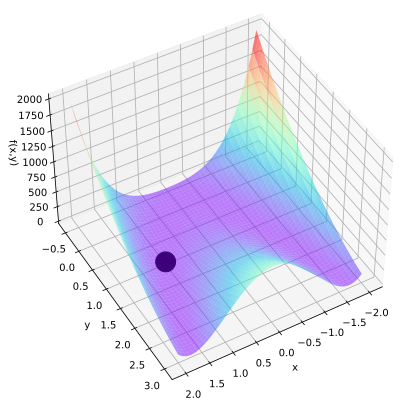

In [23]:
from scipy.optimize import minimize as scipy_minimize

def f(X):
    x, y = X
    return (1-x)**2 + 100.*(y-x**2)**2
       
result = scipy_minimize(f, x0=[0.75, 1.5])
print(f'Minimum f = {result.fun} at x = {result.x}')

plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1, projection='3d')
x = np.linspace(-2.0, 2.0, num=50)
y = np.linspace(-0.5, 3.0, num=50)
X,Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, f((X, Y)), 
                cmap=plt.cm.rainbow, rstride=1, cstride=1, alpha=.5, linewidth=0)
ax.plot3D([result.x[0]], [result.x[1]], [result.fun], 'ok', markersize=20)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f(x,y)')
ax.view_init(elev=45, azim=60)

## Model-fitting `scipy.optimize.least_squares`

Example: Model-fitting using `least_squares`
- `least_squares(func, x0, args=())`
- minimize the residual $\min_{\vec{x}}|\vec{f}(\vec{x})|$
- starting with initial guess `x0`

Example:
- Given noisy data, fit it with the model:
  $f(t) = A \sin( \omega t + \theta)$  
- Use least squares fitting to minimize the difference between the model and the numeric data
- Let the sought parameters bee: $A = 1/3$, $\omega = 2.5 \pi$, $\theta = \pi / 5$ 

Exact parameters: [0.333 7.854 0.628]
Fit parameters  : [0.354 8.004 6.818]


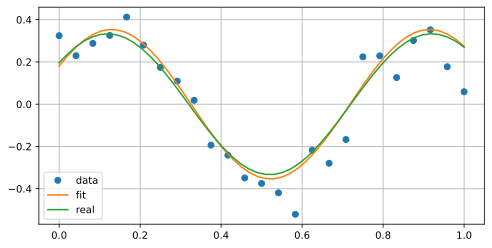

In [24]:
def model(t, A, omega, theta): return A * np.sin(omega * t + theta)
def data_model_diff(params, t, data): return model(t, *params) - data
    
t = np.linspace(0, 1, num=25)
A, omega, theta = 1/3, 2.5*np.pi, np.pi/5
data = model(t, A, omega, theta) + np.random.normal(size=t.shape, scale=0.1)
        
x0 = np.array([1.0, 6.0, 0.0])

from scipy.optimize import least_squares
result = least_squares(data_model_diff, x0, args=(t, data))

print('Exact parameters:', np.array([A, omega, theta]))
print('Fit parameters  :', result.x)
    
t_fine = np.linspace(0,1)
plt.plot(t, data, 'o', label='data')
plt.plot(t_fine, model(t_fine, *result.x), label='fit')
plt.plot(t_fine, model(t_fine, A, omega, theta), label='real')
plt.legend(loc='lower left'); plt.grid();

## Root finding `scipy.optimize`

For finding roots `scipy.optimize` provides:

Scalar function solvers:

- `root_scalar` Find a root of a scalar function.
- `brentq` Find a root of a function in a bracketing interval using Brent’s method.
- `brenth` Find a root of a function in a bracketing interval using Brent’s method with hyperbolic extrapolation.
- `ridder` Find a root of a function in an interval using Ridder’s method.
- `bisect` Find root of a function within an interval using bisection.
- `newton` Find a zero of a real or complex function using the Newton-Raphson (or secant or Halley’s) method.
- `toms748` Find a zero using TOMS Algorithm 748 method.
- and finally, `RootResults` Represents the root finding result.


Multi-dimensional non-linear solvers
  - `root` Common interface providing several methods

Here are some legacy solvers you might stumble upon (replaced by ``root`):

Multi-dimensional large-scale non-linear solvers
  - `newton_krylov`, Newton's method with Krylov approximation of inverse Jacobian
  - `anderson`, Extended Anderson mixing method

Multi-dimensional: Simple solvers
  - `exitingmixing`, Newton with Tuned diagonal Jacobian approx.
  - `linearmixing`, Newton using scalar Jacobian approx.
  - `diagbroyden`, Newton using Broyden Jacobian approx.

## Example: Root finding with `scipy.optimize.root`
- `root(fun, x0)`, solves $\vec{f}(\vec{x}) = \vec{0}$ with initial guess $\vec{x}_0$
- Solve the equation $x + \sqrt{2} \cos x = 0$

Root at x = [-0.89]


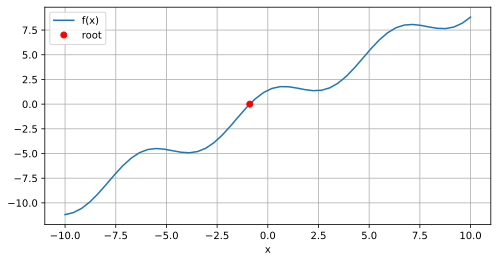

In [25]:
f = lambda x: x + np.sqrt(2) * np.cos(x)

from scipy.optimize import root as scipy_root

result = scipy_root(f, x0=-5.0)
print('Root at x =', result.x)

x = np.linspace(-10, 10)
plt.plot(x, f(x), label='f(x)')
plt.plot(result.x, f(result.x), 'ro', label='root')
plt.legend(loc='best'); plt.grid(True); plt.xlabel('x');

In [26]:
print(result)

    fjac: array([[-1.]])
     fun: array([1.11e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.077e-13])
       r: array([-2.099])
  status: 1
 success: True
       x: array([-0.89])


# Sparse Matrices `scipy.sparse`

- The NumPy `ndarray` datatype stores data continous and "dense" in memory, i.e. every element in the array is stored
- Data is stored independently on whether it is zero or not

However, many engineering problems (e.g. FEM, CFD, etc.) can be formulated in terms of **sparse matrices**.
- A sparse matrix only stores its non-zero elements,
- together with their position in the matrix.
- This is very efficient if the number of non-zero elements is small!

SciPy provides support for sparse representation of arrays and matrices in [the `scipy.sparse` package.](https://docs.scipy.org/doc/scipy/reference/sparse.html)

### Sparse matrix formats

There are several Matrix storage formats available:
   - Compressed Sparse Row `csr`
   - Compressed Sparse Column `csc`
   - Block Sparse Row `bsr`
   - List of Lists `lil`
   - Dictionary of Keys `dok`
   - Coordinate format `coo`
   - Diagonal format `dia`

Advice:
   - For matrix construction: use `lil`, supports fancy indexing (as NumPy)
   - For matrix calculations eg. multiplication: use `csr` or `csc`
   - Conversion from `lil` to, for example, `csr` is cheap!

## Example: Matrix-matrix multiplication `scipy.sparse`

In [27]:
import scipy.sparse as sparse
    
N = 500
A = sparse.rand(N, N, density=0.01, format='csr')

loops = 400
t = time.time()
for idx in range(loops):
    B = A * A
print('Sparse mat-mul: {:2.4f} s'.format(time.time() - t))
    
A = A.todense()
    
t = time.time()
for idx in range(loops):
    B = A * A
print('Dense  mat-mul: {:2.4f} s'.format(time.time() - t))

Sparse mat-mul: 0.0434 s
Dense  mat-mul: 1.9465 s


## Sparse Linear Algebra `scipy.sparse.linalg`

- Specialized linear algebra algorithms for sparse matrices
- `scipy.sparse.linalg` [SciPy Sparse Linear Algebra sub-package](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)
- These are all **implicit matrix** Linear algebra routines

Iterative linear system solvers, for $A\mathbf{x} = \mathbf{b}$
- `bicg`, Biconjugate Gradient 
- `bicgstab`, Biconjugate Gradient Stabilized 
- `cg`, Conjugate Gradient
- `cgs`, Conjugate Gradient Squared
- `gmres`, Generalized Minimal Residual
- `lgmres`, Improved GMRES
- `gmr`, Quasi-minimal Residual
- `lsgr`, Least-squares solver

Matrix Factorizations
- `eigs`, `eigsh`, Partial eigenvalues and eigen vectors
- `lobpcg`, Symmetric partial eigenproblems (with preconditioning)
- `svds`, Partial singular value decomposition
- `splu`, `spilu`, Complete and incomplete LU-factorization

## Compressed sparse graphs `scipy.sparse.csgraph`

For analysing and working with
- The graph-based algorithms in SciPy
- represents graphs and trees as sparse matrices.
- The algorithms are part of [the `scipy.sparse.csgraph` sub-package](https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html)

The module contains routines for:
- analysing graps, `connected_components`, `laplacian`
- re-ordering graps `breadth_first_order`, `depth_first_order`, `breadth_first_tree`, `depth_first_tree`, `minimum_spanning_tree`
- finding the shortest path through a graph, `shortest_path(csgraph)`, `dijkstra`, `floyd_warshall`, `bellman_ford`

Common for all of these is that the 
- first input to them is a representation of the graph through a **distance/weight matrix**
- This matrix have dimension `(N, N)` where `N` is the number of nodes in the graph.
- For connected nodes `i, j`, the value at position `N[i,j]` represent the *distance* or *weight* for their connection.
- If nodes `i, j` are *not* connected this is represented by an empty (or zero) element in the sparse matrix.

### Example:

Consider the following undirected graph:
```python
     (0)
    /   \
   0.1   0.2
  /       \
(2)       (1)
```
This graph has three nodes, where node 0 and 1 are connected with a weight of 0.2, and nodes 0 and 2 are connected with a weight of 0.1.

We can construct the dense, masked, and sparse representations as follows, keeping in mind that an undirected graph (= same weight / cost going from A ->B as going from B -> A) is represented by a symmetric matrix:

In [28]:
G_dense = np.array([[0  , 0.2, 0.1],
                    [0.2, 0  , 0  ],
                    [0.1, 0  , 0  ]])
G_masked = np.ma.masked_values(G_dense, 0)

from scipy.sparse import csr_matrix

G_sparse = csr_matrix(G_dense)

print('Dense:\n', G_dense, sep='')
print('Masked:\n', G_masked, sep='')
print('Sparse:\n', G_sparse, sep='')

Dense:
[[0.  0.2 0.1]
 [0.2 0.  0. ]
 [0.1 0.  0. ]]
Masked:
[[-- 0.2 0.1]
 [0.2 -- --]
 [0.1 -- --]]
Sparse:
  (0, 1)	0.2
  (0, 2)	0.1
  (1, 0)	0.2
  (2, 0)	0.1


# Triangulations, Voronoi-diagrams and convex hulls `scipy.spatial`

In many cases there is a need to construct a mesh or divide a surface into parts given a set of points.

[The `scipy.spatial` module](https://docs.scipy.org/doc/scipy/reference/spatial.html) provides methods for:
- Delaunay triangulation in n dimensions: `Delaunay(points, ...)`,<br> i.e. create a mesh based on triangles with the given points as corners
- Constructing Voronoi-diagrams in n dimensions: `Voronoi(point, ...)`,<br> i.e. divide an surface into parts where each point in a part is closer to the given input-point than to any other input-point
- Convex hulls in n dimensions: `ConvexHull(points, ...)`

The module provides convenient helpers to plot these in the 2D-case.

`scipy.spatial` also contains routines for fast nearest neighbour lookup, and distance computations.
- `KDTree` takes a `(N, M)` array-like object as input, 
  - where `N` is the number of points, 
  - and `M` is the spatial dimension of the problem.
- `cKDTree` is a faster, C-based implementation, of KDTree
- `distance` contains methods for the calculation of distances between points in a given input set

points =
 [[0.  0. ]
 [0.1 0. ]
 [0.2 0.1]
 [0.  0.3]]
[0.1   0.224 0.3   0.141 0.316 0.283]
 0->1  0->2  0->3  1->2  1->3  2->3


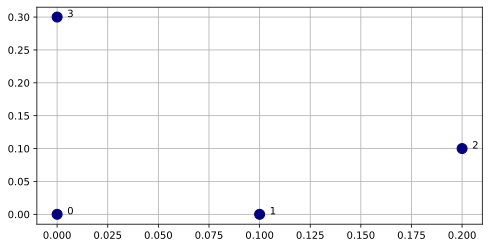

In [29]:
from scipy.spatial import distance

points = np.array([[0.0, 0.0], [0.1, 0.0], [0.2, 0.1], [0.0, 0.3]])
print('points =\n', points)

dists = distance.pdist(points)
print(dists)
print(' 0->1  0->2  0->3  1->2  1->3  2->3')

for idx, (x, y) in enumerate(points):
    plt.plot(x, y, 'o', markersize=10, color='Navy')
    plt.text(x + 0.005, y, str(idx))
plt.grid()

## Multi-dimensional image processing

The SciPy multi-dimensional image processing module `scipy.ndimage`,<br>
contains methods for "Images" with n-dimensions, eg. MRI etc. such as
- Filter functions
- Correlation
- Convolution
- Derivatives
- Spline pre-filters

For more info see http://docs.scipy.org/doc/scipy/reference/ndimage.html

## File I/O

The `scipy.io` module (https://docs.scipy.org/doc/scipy/reference/tutorial/io.html) contains the extra I/O routines:
- `loadmat(fname)`, load MATLAB `.mat` data file
- `savemat(fname, dict)`, save dictionary of names and arrays to MATLAB `.mat`-file
- `readsav(fname)`, read IDL `.sav`-files
- `wavfile.read(file)`, read `.wav` sound file
- `wavfile.write(fname, rate, data)`, write `.wav` sound file
- `arff.loadarff(file)`, Load an ARFF file standard format for WEKA<br>
  Weka is a collection of machine learning algorithms for data mining tasks
- `netcdf.netcdf_file(fname)`, read a NetCDF file.

## Tip: Debugging in PyCharm

https://www.jetbrains.com/help/pycharm/debugging-your-first-python-application.html

https://www.youtube.com/watch?v=QJtWxm12Eo0

# Lecture 5: The End

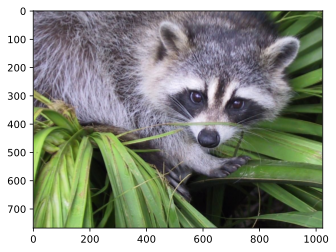

In [30]:
from scipy import misc
import matplotlib.pyplot as plt
face = misc.face()
plt.imshow(face);

# Lecture 5: Extra material

# Statistics `scipy.stats`

[The SciPy statistics module `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) contains:
- Continuous distributions
- Discrete distributions
- Statistical functions


Random distributions:
- 80 different continuous distributions
- 10 different discrete distributions

## Continuous Distributions


<table border="0">
<tr><td> alpha          </td><td>  anglit        </td><td>  arcsine       </td><td>  beta          </td><td>  betaprime        </td></tr>
<tr><td> bradford       </td><td>  burr          </td><td>  cauchy        </td><td>  chi           </td><td>  chi2             </td></tr>
<tr><td> cosine         </td><td>  dgamma        </td><td>  dweibull      </td><td>  erlang        </td><td>  expon            </td></tr>
<tr><td> exponpow       </td><td>  exponweib     </td><td>  f             </td><td>  fatiguelife   </td><td>  fisk             </td></tr>
<tr><td> foldcauchy     </td><td>  foldnorm      </td><td>  frechet_l    </td><td>  frechet_r    </td><td>  gamma            </td></tr>
<tr><td> gausshyper     </td><td>  genexpon      </td><td>  genextreme    </td><td>  gengamma      </td><td>  genhalflogistic  </td></tr>
<tr><td> genlogistic    </td><td>  genpareto     </td><td>  gilbrat       </td><td>  gompertz      </td><td>  gumbel_l        </td></tr>
<tr><td> gumbel_r      </td><td>  halfcauchy    </td><td>  halflogistic  </td><td>  halfnorm      </td><td>  hypsecant        </td></tr>
<tr><td> invgamma       </td><td>  invgauss      </td><td>  invnorm       </td><td>  invweibull    </td><td>  johnsonsb        </td></tr>
<tr><td> johnsonsu      </td><td>  ksone         </td><td>  kstwobign     </td><td>  laplace       </td><td>  levy             </td></tr>
<tr><td> levy_l        </td><td>  levy_stable  </td><td>  loggamma      </td><td>  logistic      </td><td>  loglaplace       </td></tr>
<tr><td> lognorm        </td><td>  lomax         </td><td>  maxwell       </td><td>  mielke        </td><td>  nakagami         </td></tr>
<tr><td> ncf            </td><td>  nct           </td><td>  ncx2          </td><td>  norm          </td><td>  pareto           </td></tr>
<tr><td> powerlaw       </td><td>  powerlognorm  </td><td>  powernorm     </td><td>  rayleigh      </td><td>  rdist            </td></tr>
<tr><td> recipinvgauss  </td><td>  reciprocal    </td><td>  rice          </td><td>  semicircular  </td><td>  t                </td></tr>
<tr><td> triang         </td><td>  truncexpon    </td><td>  truncnorm     </td><td>  tukeylambda   </td><td>  uniform          </td></tr>
<tr><td> vonmises       </td><td>  wald          </td><td>  weibull\_max  </td><td>  weibull\_min  </td><td>  wrapcauchy       </td></tr>
</table>

### Discrete Distributions

<table border="0">
<tr><td> bernoulli  </td><td>  binom    </td><td>  boltzmann  </td><td>  dlaplace  </td><td>  geom     </td></tr>
<tr><td> hypergeom  </td><td>  logser   </td><td>  nbinom     </td><td>  planck    </td><td>  poisson  </td></tr>
<tr><td> randint    </td><td>  skellam  </td><td>  zipf       </td><td>            </td><td>           </td></tr>
</table>

## Continuous Distributions Interface

- Parameters, defined in the `shapes` method.
   
- Methods implemented by all continuous distributions 
  - `rvs(N)`, draw `N` Random Value Samples
  - `pdf(x)`, Probability Distribution Function
  - `cdf(x)`, Cumulative Distribution Function
  - `sf(x)`, Survival Function $(1-\textrm{cdf}(x))$
  - `ppf(y)`, Percent Point Function $\textrm{cdf}^{-1}(y)$
  - `isf(y)`, Inverse Survival Function $\textrm{isf}^{-1}(y)$

- `stats(..)`, mean, variance, skew or kurtois?
  - `moment(n)`, `n`:th order moment of distribution

- Distribution parameter estimators
  - `fit(data)`, Maximum likely hood estimation of distribution parameters from `data`
  - `fit_loc_scale(data)`, fit only `location` and `scale` with fixed `shape`
  - `expect(func=f)`, expected value of function wrt. the distribution

### Example: Non-central Student T distribution 
- `scipy.stats.nct`
- [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nct.html#scipy.stats.nct)

In [31]:
from scipy import stats as scipy_stats
print('Parameters:', scipy_stats.nct.shapes)

Parameters: df, nc


In [32]:
help(scipy_stats.nct)

Help on nct_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.nct_gen object>
    A non-central Student's t continuous random variable.
    
    As an instance of the `rv_continuous` class, `nct` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(df, nc, loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, df, nc, loc=0, scale=1)
        Probability density function.
    logpdf(x, df, nc, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, df, nc, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, df, nc, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, df, nc, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, df, nc, loc=0, scale=1

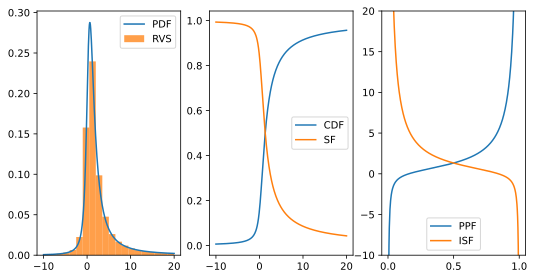

In [33]:
df = 1.0; nc = 1.0
n = scipy_stats.nct(df, nc)
x = np.linspace(-10, 20, num=400)
y = np.linspace(0, 1, num=400)
    
plt.subplot(131)
plt.plot(x, n.pdf(x), label='PDF'); 
plt.hist(n.rvs(100000), bins=20, density=True, alpha=0.75, 
         range=(np.min(x), np.max(x)), label='RVS'); 
plt.legend()

plt.subplot(132)
plt.plot(x, n.cdf(x), label='CDF')
plt.plot(x, n.sf(x),  label='SF')
plt.legend(loc='best')
    
plt.subplot(133)
plt.plot(y, n.ppf(y), label='PPF')
plt.plot(y, n.isf(y), label='ISF')
plt.legend(loc='best')
plt.ylim([np.min(x), np.max(x)])
    
plt.subplots_adjust(bottom=.1, top=.95, left=.1, right=.95)
plt.show()        

# Signal Processing

[The Signal Processing Toolbox `scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)
   
Components:
   - Convolution, in 2 and N-dimensions
   - B-spline interpolation algorithms, specialized for equally-spaced data
   - Filtering functions
   - Filter design
   - Window functions
   - Wavelets
   - Peak finding
   

### The Signal Processing Toolbox: Convolution

From Wikipedia:

"In mathematics and, in particular, functional analysis, convolution is a mathematical operation on two functions f and g, producing a third function that is typically viewed as a modified version of one of the original functions, giving the area overlap between the two functions as a function of the amount that one of the original functions is translated."

### Example: convolution, Wiener filter, B-spline fit and edge detection

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


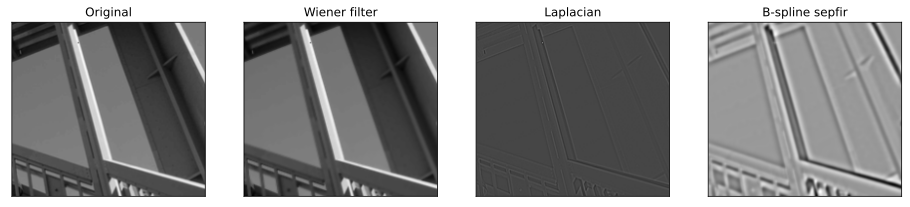

In [34]:
from scipy.misc import ascent
import scipy.signal as signal
import numpy as np
    
image = ascent()[180:360, 200:400]

laplacian = np.array([[0, 1, 0],
                      [1,-4, 1],
                      [0, 1, 0]], dtype=float)

deriv2 = signal.convolve2d(image, laplacian, mode='same',boundary='symm')

wiener = signal.wiener(image)
        
derfilt = np.array([1, -2, 1], dtype=float)
ck = signal.cspline2d(image,8.0)
deriv = signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt)            

import matplotlib.cm as cm
plt.figure(figsize=plt.figaspect(0.25))
    
data_list = [image, wiener, deriv2, deriv]
title_list = ['Original', 'Wiener filter', 'Laplacian', 'B-spline sepfir']
ax = None
for idx, (data, title) in enumerate(zip(data_list, title_list)):
    plt.subplot(1, 4, idx+1)
    plt.title(title)
    plt.imshow(data, cmap=cm.gray)
    plt.xticks([]); plt.yticks([])
    plt.axis('image')

### Question: Can we do the 2D Laplacian faster by a convolution?

In [35]:
from scipy.signal import convolve, fftconvolve

f = np.random.random((1000, 1000))
stencil = np.array([[0., 1., 0.],
                    [1.,-4., 1.],
                    [0., 1., 0.]])
t = time.time()
fnabla2 = convolve(f, stencil, mode='valid')
print('convolve:     {:4.3f} s  '.format(time.time() - t))

t = time.time()
fnabla2_fft = fftconvolve(f, stencil, mode='valid')
print('FFT convolve: {:4.3f} s  '.format(time.time() - t))

t = time.time()
Nabla2f = np.zeros(np.array(f.shape) - np.array([2, 2]))
Nabla2f[:] = f[2:, 1:-1] + f[0:-2, 1:-1] + f[1:-1, 2:] + f[1:-1, 0:-2] - 4 * f[1:-1, 1:-1]
print('plain NumPy:  {:4.3f} s  '.format(time.time() - t))
     
np.testing.assert_array_almost_equal(fnabla2, fnabla2_fft)
np.testing.assert_array_almost_equal(fnabla2, Nabla2f)

convolve:     0.032 s  
FFT convolve: 0.024 s  
plain NumPy:  0.007 s  


- Question: Why do the performance degrade?

## What are *implicit matrix algorithms*?

-  The **implicit matrix** algorithms __only__ use the matrix-vector product operation, $A \cdot \vec{x}$.

- Valid matrix objects are
   - Dense matrices
   - Sparse matrices
   - `scipy.sparse.linalg.LinearOperator`

### Example: Implicit matrix problem using `scipy.sparse.LinearOperator`
- The Laplacian operator in 2D, ex. the Diffusion equation:
  $\nabla^2 f(\mathbf{x}) = \mathbf{b}$

In [36]:
def Laplacian(f):
    """ Given a 2D array compute the Laplacian in the two dimensions. """
    df = np.zeros_like(f)
    df[1:-1, 1:-1] += np.diff(f, n=2, axis=0)[:, 1:-1]
    df[1:-1, 1:-1] += np.diff(f, n=2, axis=1)[1:-1, :]        
    return df

- Diffusion equation (Laplacian with rhs)
  $\nabla^2 f(\mathbf{x}) = \mathbf{b}$

Observation:
- $f(\mathbf{x})$ and $\mathbf{b}$ can be considered as vectors
- $\nabla^2$ as a linear operator (a matrix)

Embedd the `Laplacian` function in a `LinearOperator` object

In [37]:
def get_Laplacian_LinearOperator(grid_shape):
    def matvec(vec):
        f = vec.reshape(grid_shape)
        df = Laplacian(f)
        out_vec = df.flatten()
        return out_vec
    
    from scipy.sparse.linalg import LinearOperator
        
    N = np.prod(grid_shape)
    LaplacianOperator = LinearOperator((N, N), matvec=matvec, dtype=float)
    
    return LaplacianOperator

Solve using Conjugate Gradient implicit linear systems solver `scipy.sparse.linalg.cg`

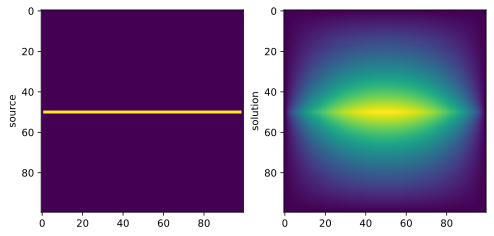

In [38]:
source = np.zeros(shape=(100, 100))
source[50, 1:-1] = -1.0

L = get_Laplacian_LinearOperator(source.shape)
b = source.flatten() # RHS vec w. source terms    
f0 = np.zeros_like(source).flatten() # initial guess

# -- Solve L * f = b, using CG iterative solver
from scipy.sparse.linalg import cg as scipy_cg
f_sol, err = scipy_cg(L, b, x0=f0)
f = f_sol.reshape(source.shape)
        


plt.subplot(121)
plt.imshow(-source, interpolation='nearest')
plt.ylabel('source')
plt.subplot(122)
plt.imshow(f, interpolation='nearest')
plt.ylabel('solution');